## 3-5 군집(clustering)

### [목표] 
<font size=3> 데이터 셋을 클러스터(cluster)라는 그룹으로 나누는 작업. 한 클러스터 안의 데이터 포인터끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표</font>

In [22]:
import mglearn
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### clustering
<pre>
(가) 삼각형은 클러스터 중심이고 원은 데이터 포인트이다.
(나) 중심 할당, 중심 재갱신, 포인트의 변화 없으면 알고리즘 중지
</pre>

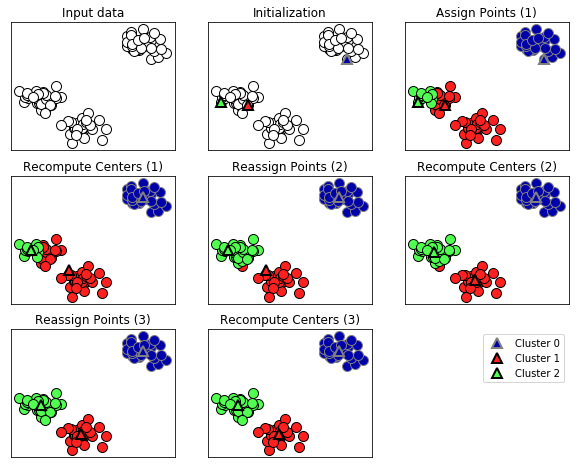

In [13]:
mglearn.plots.plot_kmeans_algorithm()

#### 클러스터 중심의 경계

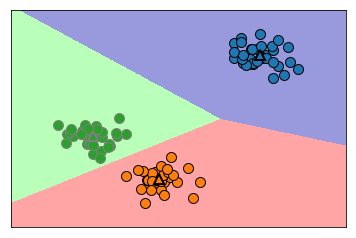

In [14]:
mglearn.plots.plot_kmeans_boundaries()

### k-means를 이용한 clustering(군집)
<pre>
01  인위적으로 데이터 생성(make_blobs)
02  clustering(군집) 모델 생성
03  학습
04  예측
</pre>

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

In [26]:
# 인위적으로 2차원 데이터 생성
X, y = make_blobs(random_state=1)

# 군집 모델 만들기
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 레이블 확인
print("클러스터 레이블:\n{}".format(kmeans.labels_))

# 예측
print(kmeans.predict(X))

클러스터 레이블:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


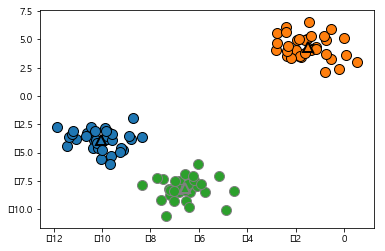

In [27]:
# 각 점 표시
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')

# 클러스터의 중심을 삼각형으로 표시
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1], 
    [0,1,2],
    markers='^', 
    markeredgewidth=2)

### 클러스터의 개수를 줄이거나 늘리기

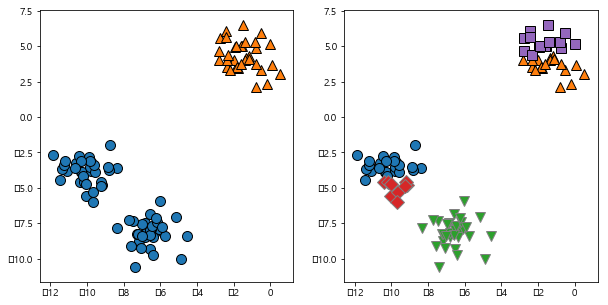

In [28]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

# 두개의 클러스터 중심을 사용.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯개의 클러스터 중심을 사용.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments =  kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

### k-평균 알고리즘이 실패하는 경우
<pre>
(1) 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타난다.
(2) k-means은 모든 클러스터의 반경이 <b>똑같다고 가정</b>한다.
(3) 클러스터 중심 사이의 정확히 중간에 경계를 그린다.
</pre>

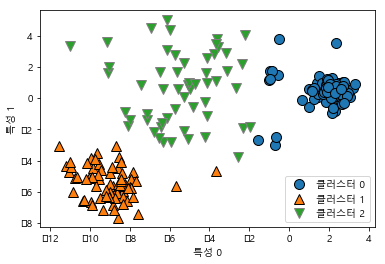

In [29]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 그룹들이 대각선으로 되어 있는 경우,

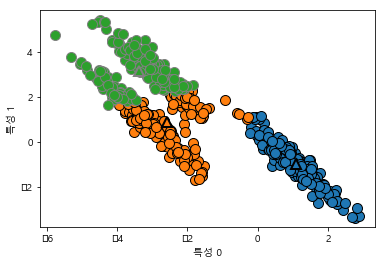

In [30]:
# 무작위로 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0],
                         X[:,1],
                         kmeans.labels_,
                         markers='o')

mglearn.discrete_scatter(
   kmeans.cluster_centers_[:,0],
   kmeans.cluster_centers_[:,1], 
   [0,1,2],
   markers="^",
   markeredgewidth=2)

plt.xlabel('특성 0')
plt.ylabel('특성 1')


### 원형이 아닐경우, 클러스터를 구분하지 못하는 k-means(평균) 알고리즘

### 실습 01. K-means로 데이터 셋 클러스터 만들어보기
<pre>
아래와 같이 make_moons 메서드를 이용하여 데이터를 생성했다. 
(1) X,y 이에 대한 클러스터(2개 그룹)으로 나누고,
(2) 이를 학습 후(fit), 위의 내용을 참고하여 이에 대한 데이터를 그래프위에 표시해보자. 
</pre>